In [1]:
from hossam import load_data
from pandas import pivot_table, melt

In [2]:
origin = load_data("city_people")
origin

[data] https://data.hossam.kr/data/lab05/city_people.xlsx
[desc] 서울, 인천, 부산에서 2005년, 2010년 2015년에 조사한 가상의 인구수 데이터(인덱스와 메타데이터 없음)
[!] Cannot read metadata


,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [3]:
pivot1 = pivot_table(origin,
                     index = '도시',
                     columns = '연도',
                     values = '인구')
print(type(pivot1))
pivot1

<class 'pandas.core.frame.DataFrame'>


연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,2632035.0,2890451.0


In [4]:
pivot_table(origin,
            index = '지역',
            columns = '연도',
            values = '인구',
            aggfunc = 'sum')


연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,12263517,12794763


In [5]:
pivot_table(origin,
            index = '지역',
            columns = '연도',
            values ='인구',
            aggfunc = ['sum','mean'])


sum                           mean                      
연도      2005      2010      2015       2005       2010       2015
지역                                                               
경상권  3512547   3393191   3448737  3512547.0  3393191.0  3448737.0
수도권  9762546  12263517  12794763  9762546.0  6131758.5  6397381.5

In [6]:
pivot_table(origin,
            index = ['지역','연도'],
            columns = '도시',
            values = '인구',
            aggfunc = ['mean','sum'])

mean                              sum                      
도시               부산         서울         인천         부산         서울         인천
지역  연도                                                                    
경상권 2005  3512547.0        NaN        NaN  3512547.0        NaN        NaN
    2010  3393191.0        NaN        NaN  3393191.0        NaN        NaN
    2015  3448737.0        NaN        NaN  3448737.0        NaN        NaN
수도권 2005        NaN  9762546.0        NaN        NaN  9762546.0        NaN
    2010        NaN  9631482.0  2632035.0        NaN  9631482.0  2632035.0
    2015        NaN  9904312.0  2890451.0        NaN  9904312.0  2890451.0

In [8]:
pivot_df = pivot_table(origin,
                       index= '연도', columns = '지역',
                       values = '인구', aggfunc ='mean')
pivot_df

지역,경상권,수도권
연도,,
2005,3512547.0,9762546.0
2010,3393191.0,6131758.5
2015,3448737.0,6397381.5


In [9]:
pivot_df2 = pivot_df.reset_index()
pivot_df2

지역,연도,경상권,수도권
0,2005,3512547.0,9762546.0
1,2010,3393191.0,6131758.5
2,2015,3448737.0,6397381.5


In [11]:
mdf = melt(pivot_df2, id_vars=['연도'],
           value_vars=['경상권','수도권'])
mdf

,연도,지역,value
0,2005,경상권,3512547.0
1,2010,경상권,3393191.0
2,2015,경상권,3448737.0
3,2005,수도권,9762546.0
4,2010,수도권,6131758.5
5,2015,수도권,6397381.5


In [12]:
mdf = melt(pivot_df2, id_vars=['연도'],
           value_vars=['경상권','수도권'],
           var_name='구분', value_name='인구수')
mdf

,연도,구분,인구수
0,2005,경상권,3512547.0
1,2010,경상권,3393191.0
2,2015,경상권,3448737.0
3,2005,수도권,9762546.0
4,2010,수도권,6131758.5
5,2015,수도권,6397381.5


연습문제 - 학생 흡연율 데이터 전처리

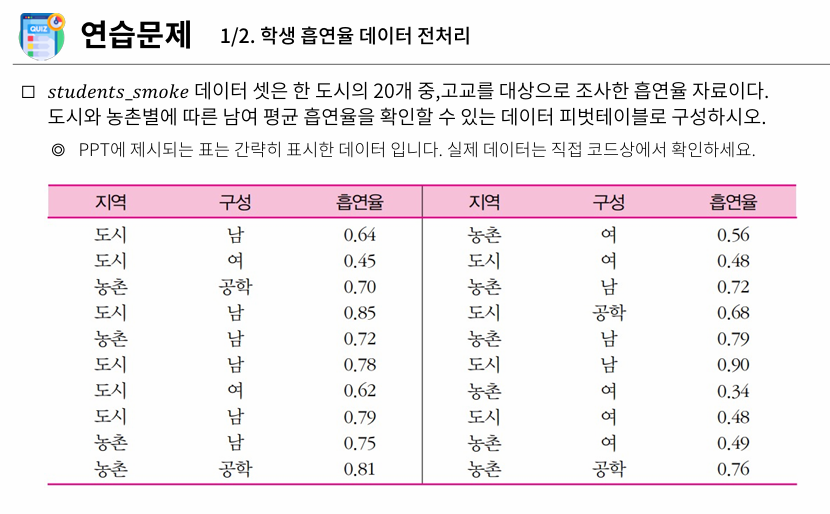

In [15]:
origin = load_data("students_smoke")
origin.head()

[data] https://data.hossam.kr/data/lab05/students_smoke.xlsx
[desc] 한 도시의 20개 중,고교를 대상으로 조사한 흡연율 자료 (인덱스와 메타데이터 없음)
[!] Cannot read metadata


,지역,구성,흡연율
0,도시,남,0.64
1,도시,여,0.45
2,농촌,공학,0.70
3,도시,남,0.85
4,농촌,남,0.72


In [18]:
city_pivot = pivot_table(origin,
                         index = '지역',
                         columns ='구성',
                         values ='흡연율',
                         aggfunc = 'mean')
city_pivot

구성,공학,남,여
지역,,,
농촌,0.756667,0.745,0.463333
도시,0.680000,0.792,0.507500


In [19]:
city_pivot_sep = city_pivot.reset_index()
city_pivot_sep

구성,지역,공학,남,여
0,농촌,0.756667,0.745,0.463333
1,도시,0.680000,0.792,0.507500


In [23]:
city_mdf = melt(city_pivot_sep, id_vars=['지역'],
                value_vars = ['공학','남','여'])
city_mdf

,지역,구성,value
0,농촌,공학,0.756667
1,도시,공학,0.680000
2,농촌,남,0.745000
3,도시,남,0.792000
4,농촌,여,0.463333
5,도시,여,0.507500


In [24]:
city_mdf = melt(city_pivot_sep, id_vars =['지역'],
                value_vars = ['공학','남','여'],
                var_name ='구분',value_name='흡연율'
                )
city_mdf

,지역,구분,흡연율
0,농촌,공학,0.756667
1,도시,공학,0.680000
2,농촌,남,0.745000
3,도시,남,0.792000
4,농촌,여,0.463333
5,도시,여,0.507500


연습문제2. - 동네 아이스크림 가게 매출 분석 챌린지!

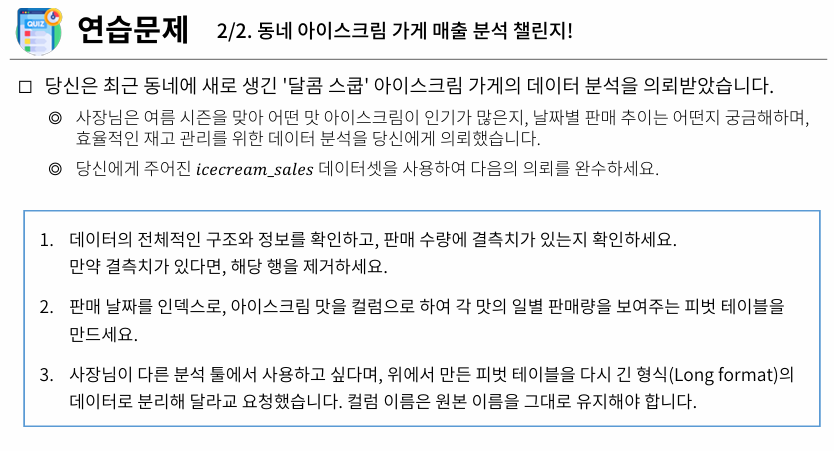

In [26]:
origin = load_data("icecream_sales")
origin.head()

[data] https://data.hossam.kr/data/lab05/icecream_sales.xlsx
[desc] '달콤 스쿱' 아이스크림 가게의 매출 데이터 (인덱스 없음)

field     description
--------  -------------
Date      판매 날짜
Flavor    아이스크림 맛
Topping   추가된 토핑
Price     개당 가격
Quantity  판매 수량



,Date,Flavor,Topping,Price,Quantity
0,2023-07-01,초콜릿,아몬드,3500,20.0
1,2023-07-01,바닐라,초코시럽,3000,25.0
2,2023-07-01,딸기,연유,3200,18.0
3,2023-07-02,민트초코,초코칩,3800,15.0
4,2023-07-02,초콜릿,아몬드,3500,22.0


In [27]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      12 non-null     datetime64[ns]
 1   Flavor    12 non-null     object        
 2   Topping   11 non-null     object        
 3   Price     12 non-null     int64         
 4   Quantity  11 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 612.0+ bytes


In [28]:
origin.isnull().sum()

Date        0
Flavor      0
Topping     1
Price       0
Quantity    1
dtype: int64

In [30]:
결측치제거df = origin.dropna()
결측치제거df.isnull().sum()

Date        0
Flavor      0
Topping     0
Price       0
Quantity    0
dtype: int64

In [34]:
ice_pivot = pivot_table(결측치제거df,
                        index = 'Date',
                        columns = 'Flavor',
                        values = 'Quantity')
# 일별 판매량이 없는 날은 0으로 대체
ice_pivot = ice_pivot.fillna(0)
ice_pivot

Flavor,딸기,민트초코,바닐라,초콜릿
Date,,,,
2023-07-01,18.0,0.0,25.0,20.0
2023-07-02,0.0,15.0,0.0,22.0
2023-07-03,25.0,0.0,28.0,0.0
2023-07-04,22.0,17.0,0.0,18.0


In [37]:
ice_pivot_mdf = melt(ice_pivot.reset_index(), id_vars=['Date'],
                     value_vars = ['딸기', '바닐라','초콜릿','민트초코'],
                     var_name = 'Flavor', value_name = 'Quantity')
ice_pivot_mdf

,Date,Flavor,Quantity
0,2023-07-01,딸기,18.0
1,2023-07-02,딸기,0.0
2,2023-07-03,딸기,25.0
3,2023-07-04,딸기,22.0
4,2023-07-01,바닐라,25.0
5,2023-07-02,바닐라,0.0
6,2023-07-03,바닐라,28.0
7,2023-07-04,바닐라,0.0
8,2023-07-01,초콜릿,20.0
9,2023-07-02,초콜릿,22.0
